In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supply_chain_data.csv')

# Preliminary Testing the Waters



In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.shape

(100, 24)

In [5]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [6]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [7]:
df['Product type'].value_counts()

,count
Product type,
skincare,40
haircare,34
cosmetics,26


In [8]:
df['Availability'].describe()

,Availability
count,100.000000
mean,48.400000
std,30.743317
min,1.000000
25%,22.750000
50%,43.500000
75%,75.000000
max,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

<Axes: >

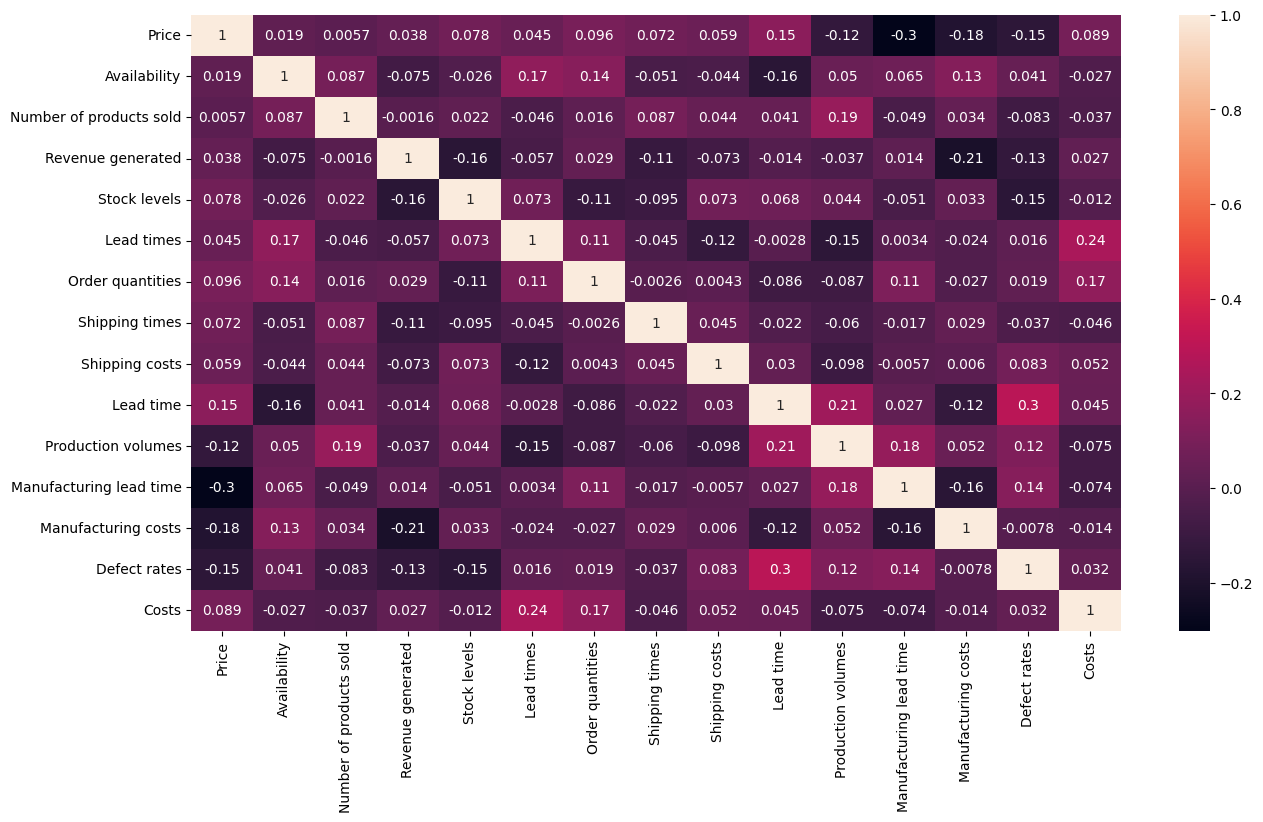

In [10]:
figsize= (15,8)
plt.figure(figsize=figsize)
sns.heatmap(df.drop(['Product type','SKU','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results','Transportation modes','Routes'],axis = 1).corr(),annot = True)

In [11]:
df['Shipping carriers'].value_counts()

,count
Shipping carriers,
Carrier B,43
Carrier C,29
Carrier A,28


In [12]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

###Product Type Columnn

In [13]:
df['Product type'].value_counts()

,count
Product type,
skincare,40
haircare,34
cosmetics,26


<Axes: xlabel='count', ylabel='Product type'>

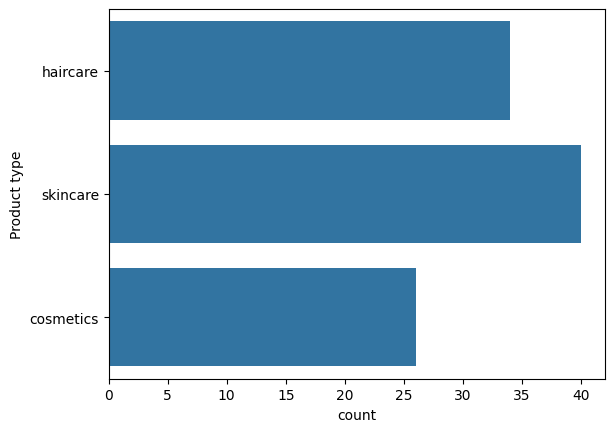

In [14]:
sns.countplot(df['Product type'])

<Axes: ylabel='count'>

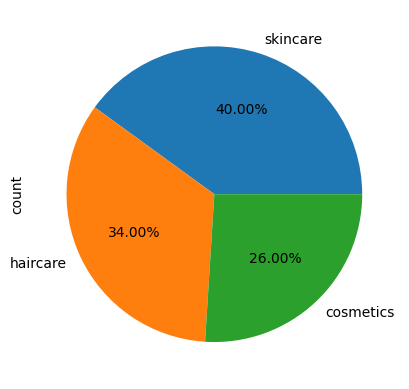

In [15]:
df['Product type'].value_counts().plot(kind='pie', autopct='%.2f%%')

## Price


In [16]:
df["Price"].sample(6)

,Price
79,57.057031
13,16.160393
91,62.111965
98,19.754605
51,26.700761
42,46.529168


<Axes: ylabel='Price'>

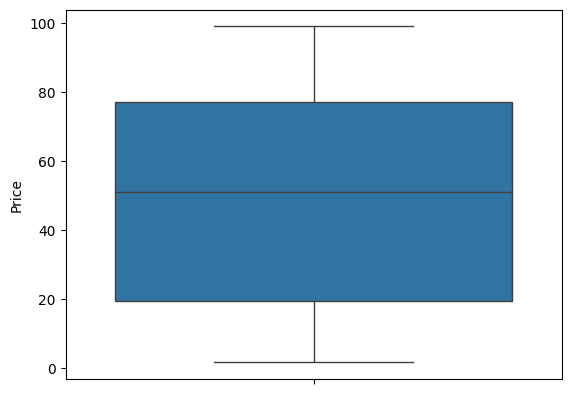

In [17]:
sns.boxplot(df['Price'])

<ipython-input-18-07bc35f19eb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins=10)


<Axes: xlabel='Price', ylabel='Density'>

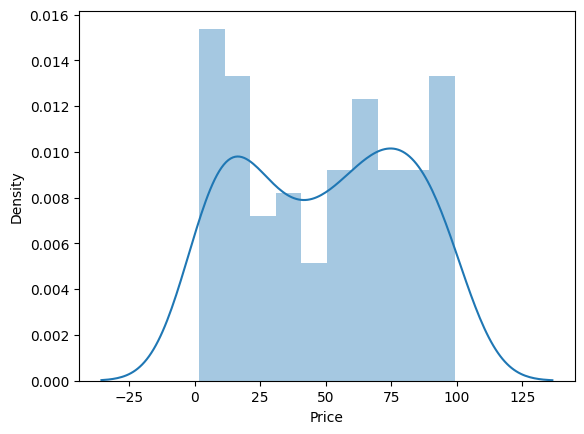

In [18]:
sns.distplot(df['Price'],bins=10)

<Axes: ylabel='Price'>

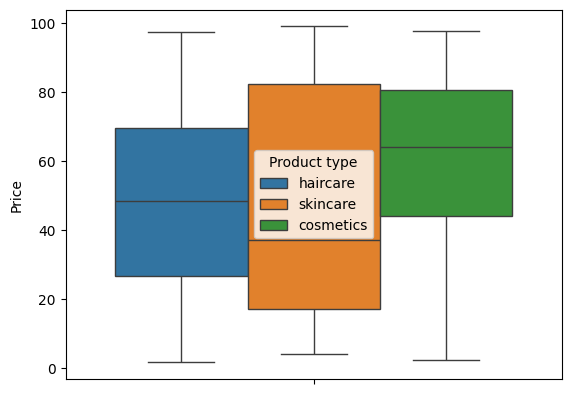

In [19]:
sns.boxplot(y = 'Price', hue = 'Product type',data=df)

## Availability

In [20]:
df['Availability'].describe()

,Availability
count,100.000000
mean,48.400000
std,30.743317
min,1.000000
25%,22.750000
50%,43.500000
75%,75.000000
max,100.000000


<Axes: ylabel='Availability'>

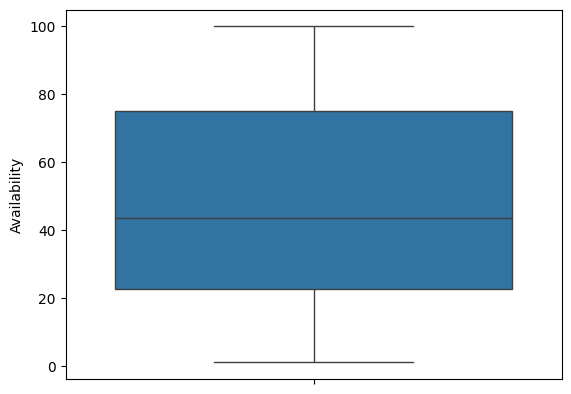

In [21]:
sns.boxplot(df['Availability'])

<ipython-input-22-8345d6a0555e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Availability'],bins = 10)


<Axes: xlabel='Availability', ylabel='Density'>

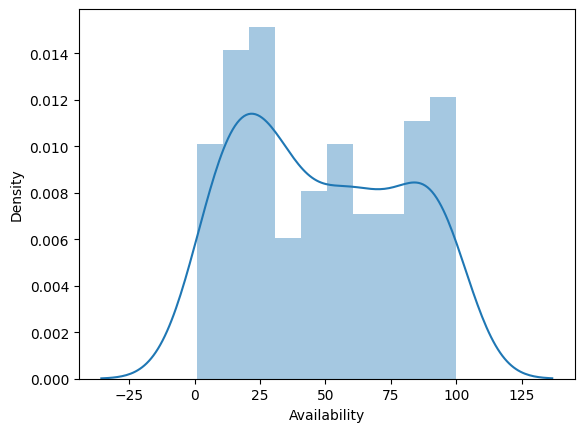

In [22]:
sns.distplot(df['Availability'],bins = 10)

<ipython-input-23-1b5d6e30cd80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number of products sold'])


<Axes: xlabel='Number of products sold', ylabel='Density'>

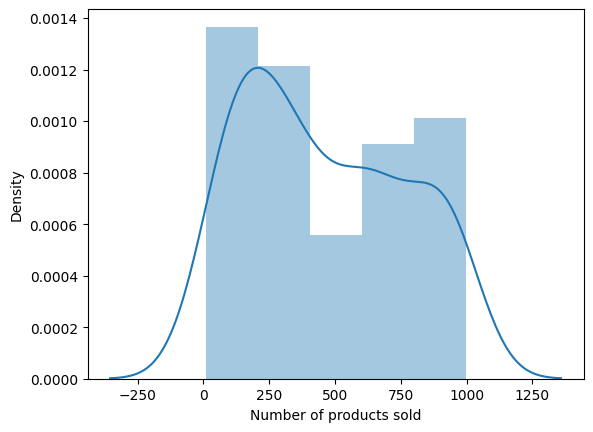

In [23]:
sns.distplot(df['Number of products sold'])

<Axes: >

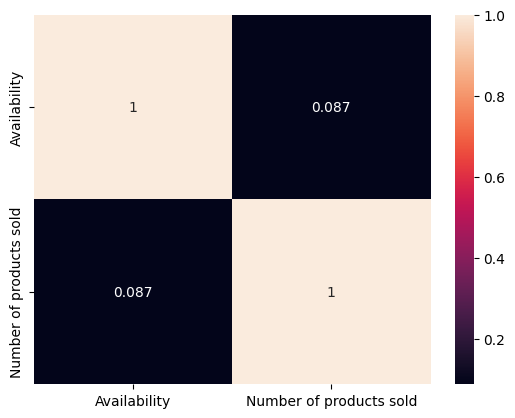

In [24]:
sns.heatmap(df.loc[:, ['Availability','Number of products sold']].corr(),annot = True)

#Surprisingly low correlation

## Carriers

<Axes: ylabel='count'>

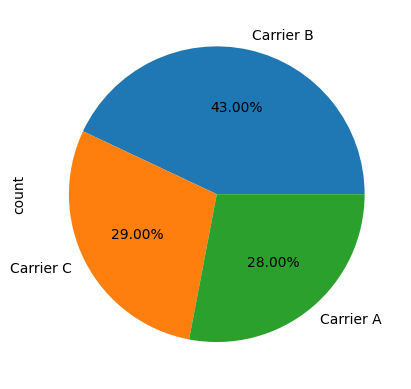

In [25]:
df['Shipping carriers'].value_counts().plot(kind='pie',autopct = "%.2f%%")

<Axes: ylabel='Number of products sold'>

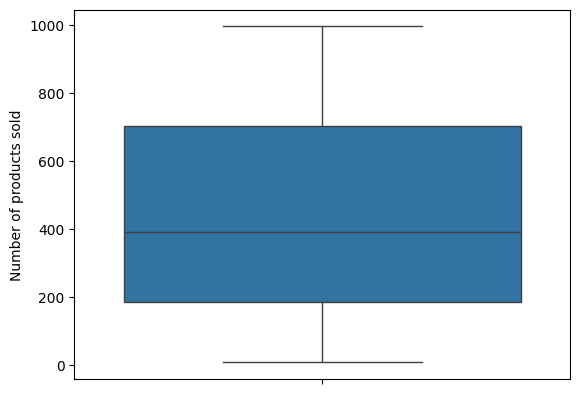

In [26]:
sns.boxplot(df['Number of products sold'])

<Axes: ylabel='count'>

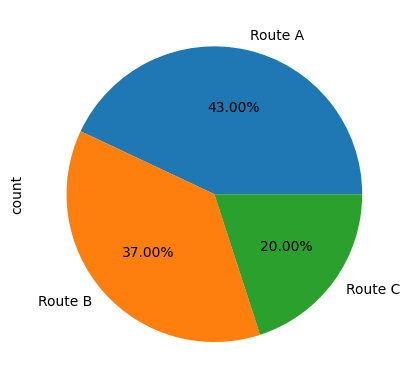

In [27]:
df['Routes'].value_counts().plot(kind='pie',autopct = "%.2f%%")

<Axes: ylabel='count'>

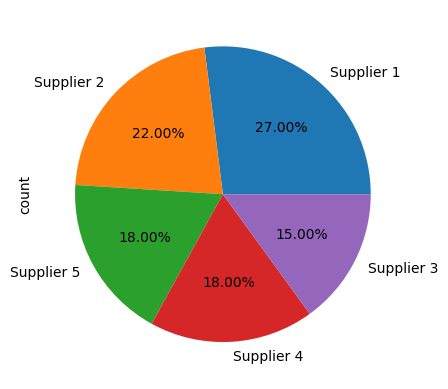

In [28]:
(df['Supplier name'].value_counts()).plot(kind = "pie", autopct = "%.2f%%" )

<Axes: ylabel='count'>

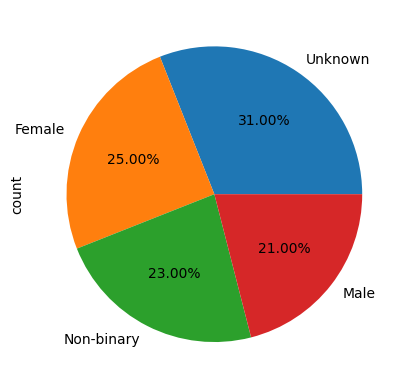

In [29]:
df['Customer demographics'].value_counts().plot(kind = 'pie', autopct = "%.2f%%")

<Axes: ylabel='Stock levels'>

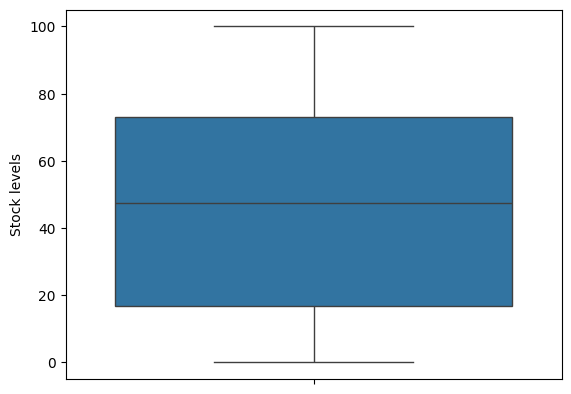

In [30]:
sns.boxplot(df['Stock levels'])

# **Multivariate Analyses**

## Preliminary Investigation

<Axes: >

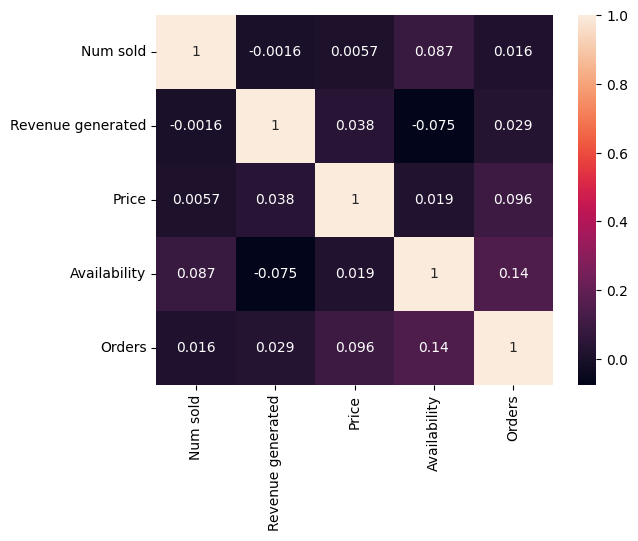

In [31]:
# new smaller df just to take a closer look at some potentially related features
df2 = pd.DataFrame({"Num sold" : df['Number of products sold'], "Revenue generated" : df['Revenue generated'], "Price" : df['Price'], "Availability" : df['Availability'], "Orders" : df['Order quantities']})
sns.heatmap(df2.corr(),annot = True)

#surprisingly low correlations everywhere

In [32]:
df['Location'].value_counts()

,count
Location,
Kolkata,25
Mumbai,22
Chennai,20
Bangalore,18
Delhi,15


## **Product Type Analysis**

<Axes: ylabel='Number of products sold'>

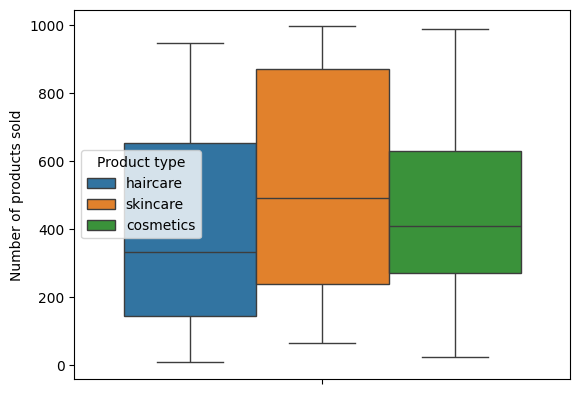

In [33]:
sns.boxplot( y = 'Number of products sold', hue = 'Product type', data = df)

Skincare shows the highest median units sold among the three product categories, suggesting stronger average demand.

However, its wide interquartile range also indicates inconsistent performance across individual products.

Cosmetics and Haircare exhibit lower and more consistent sales distributions.

In [34]:
df.columns    #for reference

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

<Axes: xlabel='Product type', ylabel='Revenue generated'>

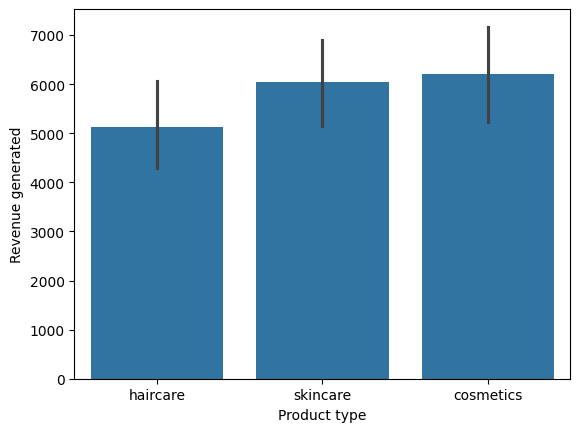

In [35]:
sns.barplot(x = 'Product type', y = 'Revenue generated', data = df)

<Axes: xlabel='Product type', ylabel='Revenue generated'>

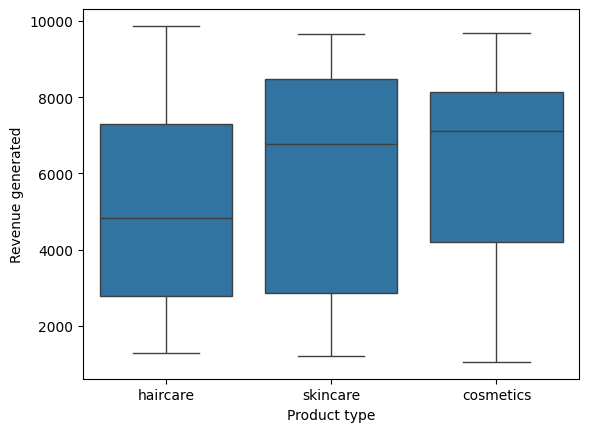

In [36]:
sns.boxplot(y = 'Revenue generated', x = 'Product type', data=df)

<Axes: xlabel='Product type', ylabel='Number of products sold'>

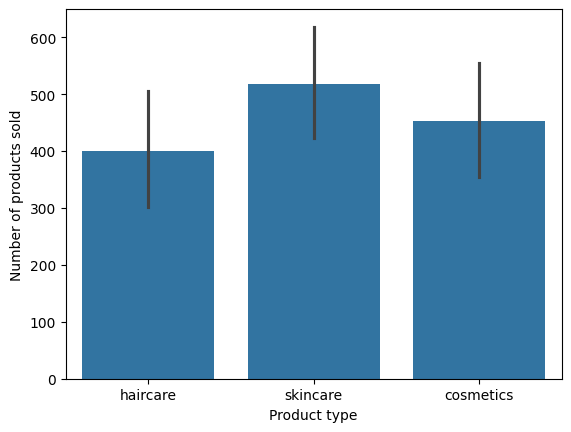

In [37]:
sns.barplot(x = 'Product type', y = 'Number of products sold', data =df)

<Axes: xlabel='Product type', ylabel='Number of products sold'>

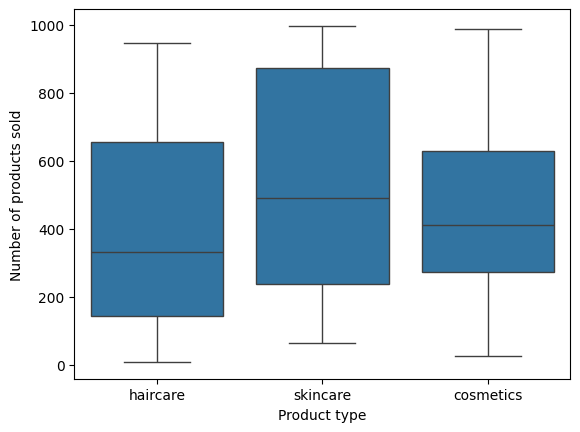

In [38]:
sns.boxplot(x = 'Product type', y = 'Number of products sold', data =df)

<Axes: xlabel='Product type', ylabel='Availability'>

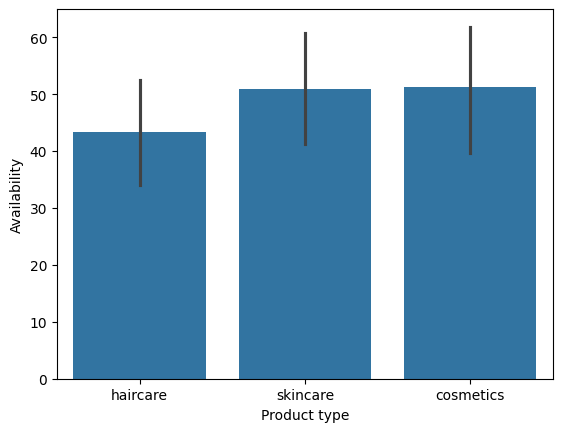

In [39]:
sns.barplot(x = 'Product type', y = 'Availability', data = df)

## **Skincare Products**

In this section, we'll take a very close look at **Skincare Products.**


In [40]:
#Creating a subset df containing only skincare products.
#Also dropping the Product Type and SKU since the former is redundant (only skincare) and the latter is essentially just an index.

skincareDf = df[df['Product type'] == 'skincare'].drop(columns=['Product type','SKU'])
skincareDf.sample(6)

,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
10,15.707796,11,996,2330.965802,Non-binary,51,13,80,2,Carrier C,...,Kolkata,18,830,5,96.527353,Pass,1.727314,Road,Route B,806.103178
1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
15,36.989245,94,469,5442.086785,Non-binary,9,8,69,7,Carrier B,...,Bangalore,14,580,7,97.121282,Pass,2.264406,Sea,Route B,127.861800
41,99.113292,35,556,5521.205259,Female,64,19,38,8,Carrier B,...,Chennai,18,892,7,95.332065,Fail,0.045302,Sea,Route A,275.524371
63,13.017377,55,246,4256.949141,Non-binary,54,19,10,4,Carrier A,...,Bangalore,18,736,10,20.075004,Pending,3.632843,Sea,Route A,687.286178
65,33.697717,72,457,8354.579686,Male,57,24,54,8,Carrier C,...,Kolkata,16,358,21,1.597223,Fail,4.911096,Rail,Route C,555.859104


### **Demographics for Skincare**

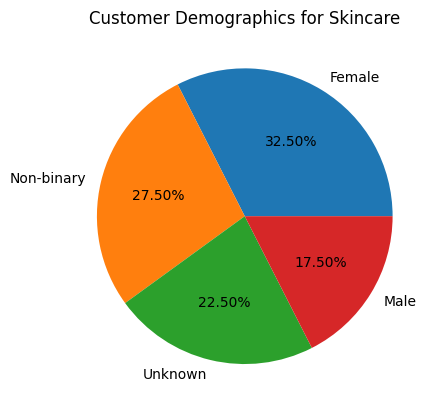

In [42]:
#customer demographics for skincare products

plt.pie(skincareDf['Customer demographics'].value_counts(), autopct = '%.2f%%', labels = skincareDf['Customer demographics'].value_counts().index)
plt.title('Customer Demographics for Skincare')
plt.show()

* We see that Female and Non-Binary individuals make up the largest brackets of customers, adding up to being **60%** of the customer base.
* => Prioritise SKUs taht aimed at these brackets.
* The low male engagement at 17.5% might indicate untapped demand or misaligned product branding.
* Also nearly a quarter of the audience is marked "unknown", suggesting potential issues in data collection.   


---



### Location Wise deep-dive into **Availability**, **Price**, **Units Sold** and **Revenue Generated**

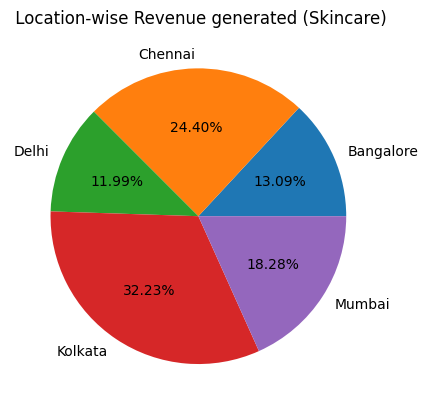

In [41]:
#total revenue generated location wise (skincare)

skincareDf.groupby('Location')['Revenue generated'].sum()

plt.pie(skincareDf.groupby('Location')['Revenue generated'].sum(), autopct = '%.2f%%', labels = skincareDf.groupby('Location')['Revenue generated'].sum().index)
plt.title(' Location-wise Revenue generated (Skincare)')
plt.show()

We can clearly see that **Kolkata** generates the most revenue from skincare products.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

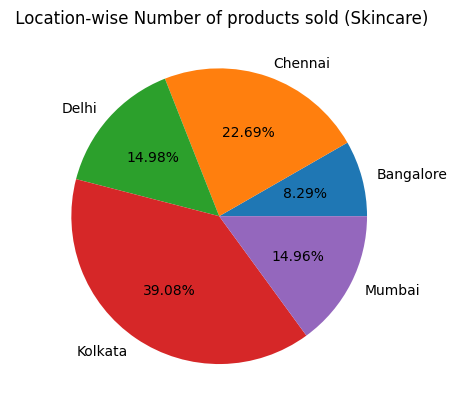

In [54]:
skincareDf.groupby('Location')['Number of products sold'].sum()

plt.pie(skincareDf.groupby('Location')['Number of products sold'].sum(), autopct = '%.2f%%', labels = skincareDf.groupby('Location')['Number of products sold'].sum().index)
plt.title(' Location-wise Number of products sold (Skincare)')
plt

* Kolkata cleraly has the most number of units sold.
* This combined with the revenue chart from earlier already begins to suggest the Kolkata supply chain is a *well-oiled machine*, with good sales as well as good revenue generation, quite possibly due to matching demand with the right mix of products.


**Revenue**

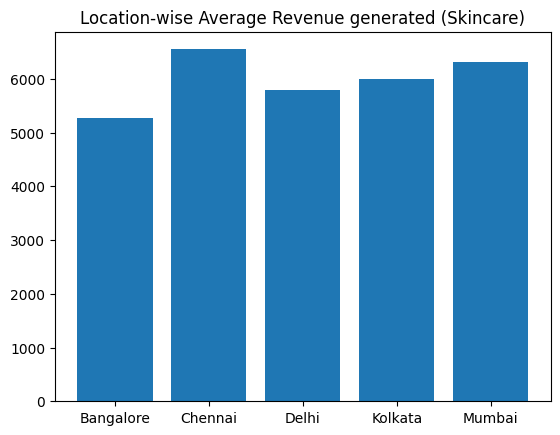

In [57]:
skincareDf.groupby('Location')['Revenue generated'].mean()

plt.bar(skincareDf.groupby('Location')['Revenue generated'].mean().index, skincareDf.groupby('Location')['Revenue generated'].mean())
plt.title('Location-wise Average Revenue generated (Skincare)')
plt.show()

Chennai clearly has the highest avg revenue generation, followed by Mumbai and Kolkata

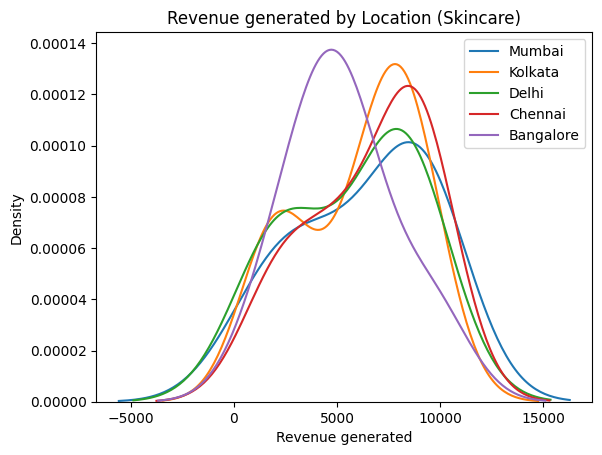

In [46]:
for i in skincareDf['Location'].unique():
  sns.kdeplot(skincareDf[skincareDf['Location'] == i]['Revenue generated'],label = i)
plt.legend()
plt.title('Revenue generated by Location (Skincare)')
plt.show()


* This plot reflects how much revenue individual skincare SKUs generate in each city.
* Kolkata stands out with a wide, strong bimodal distribution — high sales across both low and high revenue ranges.
* The prominent *Bi-Modality* of Kolkata, Chennai and to a slightly lesser extent, Delhi and Mumbai all show signs of **two** main **product segments**, a *budget version* below 5k and a *premium revenue source* (second peak around 10k+).
* Bangalore underperforms (despite consistent and high availability, as we will see in the availability chart below).


**Sales Numbers**

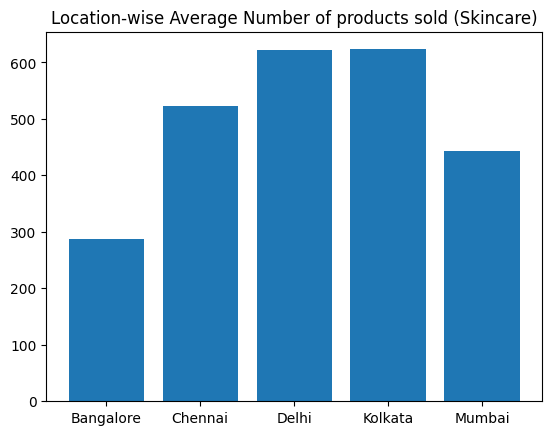

In [58]:
skincareDf.groupby('Location')['Number of products sold'].mean()

plt.bar(skincareDf.groupby('Location')['Number of products sold'].mean().index, skincareDf.groupby('Location')['Number of products sold'].mean())
plt.title('Location-wise Average Number of products sold (Skincare)')
plt.show()

* Delhi and Kolkata dominate the number of units sold.
* Bangalore clearly lags behind

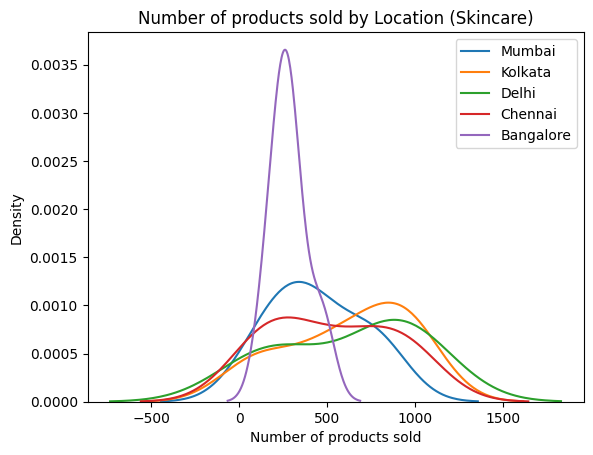

In [47]:
for i in skincareDf['Location'].unique():
  sns.kdeplot(skincareDf[skincareDf['Location'] == i]['Number of products sold'], label = i)
plt.legend()
plt.title('Number of products sold by Location (Skincare)')
plt.show()

* Bangalore is very clearly underperforming in terms of sales numbers.
* The other cities all have general wide distributions, indicating solid sales numbers.
* This could be indicative of Bengaluru stocking up teh wrong products, since the following graph indicates that Blr has the *highest median Availability.*

**Availability**

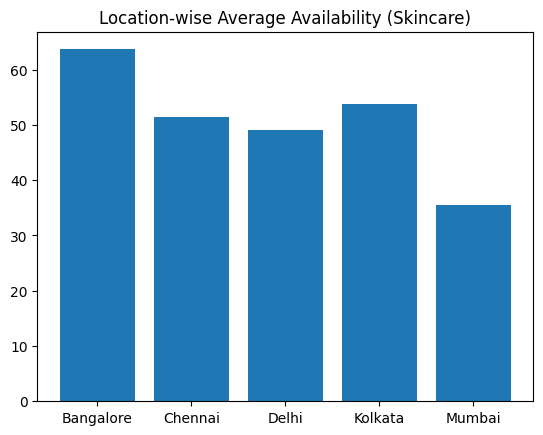

In [59]:
skincareDf.groupby('Location')['Availability'].mean()

plt.bar(skincareDf.groupby('Location')['Availability'].mean().index, skincareDf.groupby('Location')['Availability'].mean())
plt.title('Location-wise Average Availability (Skincare)')
plt.show()

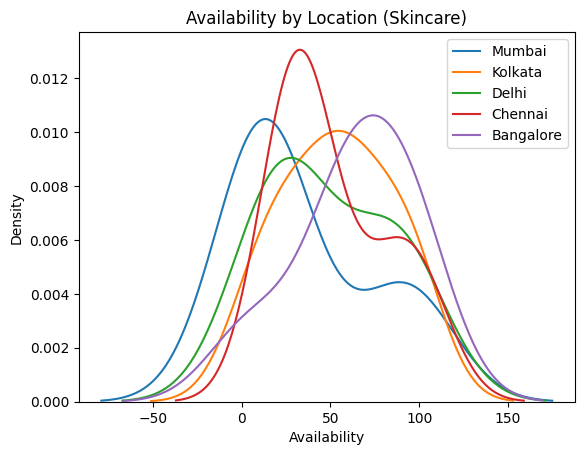

In [49]:
for i in skincareDf['Location'].unique():
  sns.kdeplot(skincareDf[skincareDf['Location'] == i]['Availability'], label = i)
plt.legend()
plt.title('Availability by Location (Skincare)')
plt.show()

* The above plot shows the location-wise distribuiton of availability of skincare products.
* Bangalore has the highest median availability, indicating consistent stocking.
* Mumbai and Delhi have Bi-Modal distributions with lower peak median availability, wider spreads and smaller peaks at higher values.
* This suggests varied inventory levels and uneven distribution of SKUs
* Chennai is also similar in this regard, with a sharp tall peak around x = 25 and a smaller peak closer to 100, indicating uneven stocking.

In [44]:
skincareDf.groupby('Location')['Price'].mean()

,Price
Location,
Bangalore,22.354211
Chennai,66.976529
Delhi,38.887125
Kolkata,52.565015
Mumbai,39.382615


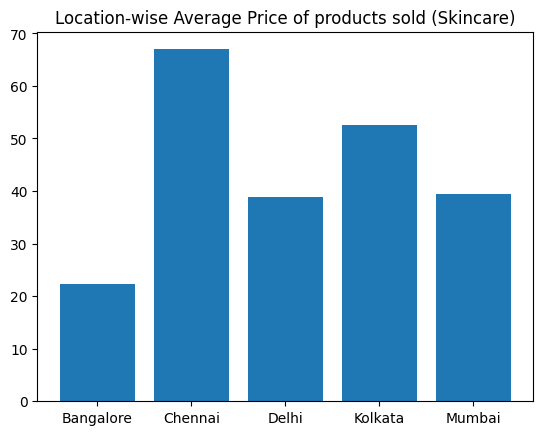

In [45]:
skincareDf.groupby('Location')['Price'].mean()

plt.bar(skincareDf.groupby('Location')['Price'].mean().index, skincareDf.groupby('Location')['Price'].mean())
plt.title('Location-wise Average Price of products sold (Skincare)')
plt.show()

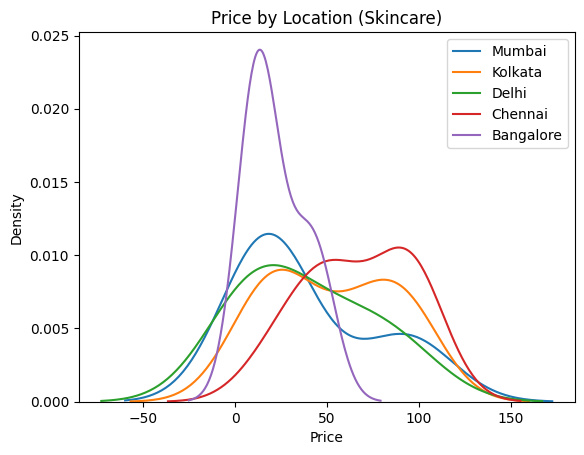

In [48]:
for i in skincareDf['Location'].unique():
  sns.kdeplot(skincareDf[skincareDf['Location'] == i]['Price'],label = i)
plt.legend()
plt.title('Price by Location (Skincare)')
plt.show()

* This plot shows the pricing distribution of skincare SKUs across locations.
* Kolkata and Mumbai have clean bimodal structures — suggesting both budget and premium SKUs are prominent.
* Chennai too has a bimodal strucutre, however, the peaks are closer together *and* both peaks occur on the higher side. This is also corroborated by the mean prices bar chart from above, which clearly show that Chennai has the highest average price per product.
* Bangalore is heavily skewed toward ultra-low prices (~10).
* Delhi stays centered around budget pricing, with minimal presence in higher tiers.


#Final Conclusions

* Across the skincare segment, regional performance varies sharply across availability, sales volume, price, and revenue:

* Kolkata stands out with strong sales and revenue, supported by a balanced pricing strategy (visible bimodal price distribution) and decent availability.

* Chennai consistently performs extremely well in revenue with pricing skewed toward the premium side. It shows potential as a high-margin market.

* Chennai however does have only medium availability and sales volume, indicating that perhaps the bottleneck here is the availability. The previous point suggests that PMF here is good, therefore, increasing availability could potentially increase the sales volume and revenue gen.

* Mumbai has strong revenue with prices indicating a strong market for premium products despite lower availability and fewer units sold — suggesting high sales volumnes of premium products.

* Once again, the availability oculd be the bottleneck here. Mumbai has a VERY distinct bimodal Price distribution => Two clear Segments, which must also be kept in mind while stocking the inventory.

* Delhi appears mid-range in both price and volume, performing decently overall but lacking standout efficiency. DElhi has high sales but medium range revenue generation, as well price per product.

* This indicates that there is scope for a test programme of introducing higher priced SKUs and then tracking the volume of sales, which if successful, would boost the revenue generation from Delhi.

* Bangalore is the most misaligned: it has the highest availability but lowest sales and revenue, with pricing skewed heavily toward ultra-low. This mismatch likely reflects poor product-market fit.

* These insights suggest that aligning product pricing and inventory with local demand profiles is critical.

* Bangalore in particular may benefit from reassessment — either by reducing overstocking or introducing better-fitting SKUs.

